<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-2-Regression-2/blob/master/Nicolae_Dubenco_DS_SC_8_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [0]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

In [0]:
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,4,5,2015-07-31,13995,1498,1,1
1,8,5,2015-07-31,8492,833,1,1
2,11,5,2015-07-31,10457,1236,1,1
3,12,5,2015-07-31,8959,962,1,1
4,34,5,2015-07-31,11144,1162,1,1
5,44,5,2015-07-31,6670,665,1,1
6,48,5,2015-07-31,3874,390,1,1
7,68,5,2015-07-31,11187,1341,1,1
8,73,5,2015-07-31,6026,537,1,1
9,101,5,2015-07-31,11075,915,1,1


In [0]:
train['Store'].unique().sum()

54469

In [0]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000
mean,544.690000,3.506378,6988.430778,826.109847,0.450255,0.195268
std,325.893217,1.710560,2824.069622,316.205067,0.497522,0.396409
min,4.000000,1.000000,1712.000000,206.000000,0.000000,0.000000
25%,259.250000,2.000000,5005.000000,599.000000,0.000000,0.000000
50%,550.000000,3.000000,6370.000000,757.000000,0.000000,0.000000
75%,826.500000,5.000000,8303.000000,993.000000,1.000000,0.000000
max,1113.000000,6.000000,27265.000000,3360.000000,1.000000,1.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78400 entries, 0 to 78399
Data columns (total 7 columns):
Store            78400 non-null int64
DayOfWeek        78400 non-null int64
Date             78400 non-null object
Sales            78400 non-null int64
Customers        78400 non-null int64
Promo            78400 non-null int64
SchoolHoliday    78400 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.2+ MB


In [0]:
test.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,10,5,2015-07-31,7185,681,1,1
1,15,5,2015-07-31,9191,766,1,1
2,31,5,2015-07-31,7248,645,1,1
3,47,5,2015-07-31,9379,1021,1,1
4,53,5,2015-07-31,7540,690,1,1
5,63,5,2015-07-31,11525,846,1,1
6,75,5,2015-07-31,7444,807,1,1
7,87,5,2015-07-31,6379,715,1,1
8,104,5,2015-07-31,10483,1223,1,1
9,107,5,2015-07-31,9194,1021,1,1


In [0]:
test['Store'].unique().sum()

53281

In [0]:
test.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000
mean,532.810000,3.506378,7284.330370,847.339515,0.450255,0.197092
std,309.619923,1.710560,3049.041944,368.874859,0.497522,0.397805
min,10.000000,1.000000,316.000000,44.000000,0.000000,0.000000
25%,261.750000,2.000000,5176.000000,592.000000,0.000000,0.000000
50%,526.000000,3.000000,6644.000000,759.000000,0.000000,0.000000
75%,762.500000,5.000000,8706.000000,998.000000,1.000000,0.000000
max,1101.000000,6.000000,31415.000000,3507.000000,1.000000,1.000000


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78400 entries, 0 to 78399
Data columns (total 7 columns):
Store            78400 non-null int64
DayOfWeek        78400 non-null int64
Date             78400 non-null object
Sales            78400 non-null int64
Customers        78400 non-null int64
Promo            78400 non-null int64
SchoolHoliday    78400 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.2+ MB


In [0]:
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
1,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
3,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
4,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
5,15,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
6,31,d,c,9800.0,7.0,2012.0,0,NaN,NaN,NaN
7,34,c,a,2240.0,9.0,2009.0,0,NaN,NaN,NaN
8,44,a,a,540.0,6.0,2011.0,0,NaN,NaN,NaN
9,47,a,c,270.0,4.0,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"


In [0]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,200.000000,199.000000,163.000000,163.000000,200.000000,36.000000,36.000000
mean,538.750000,4971.758794,7.319018,2010.748466,0.180000,23.916667,2011.666667
std,318.711977,7828.182796,3.165605,2.477911,0.385152,13.645250,0.956183
min,4.000000,30.000000,1.000000,2005.000000,0.000000,1.000000,2010.000000
25%,259.250000,890.000000,4.000000,2009.000000,0.000000,14.000000,2011.000000
50%,534.500000,2180.000000,9.000000,2011.000000,0.000000,22.000000,2012.000000
75%,819.500000,4655.000000,9.000000,2013.000000,0.000000,35.000000,2012.000000
max,1113.000000,48330.000000,12.000000,2015.000000,1.000000,48.000000,2013.000000


In [0]:
store.describe(exclude='number')

,StoreType,Assortment,PromoInterval
count,200,200,36
unique,3,2,3
top,a,c,"Mar,Jun,Sept,Dec"
freq,127,112,14


In [0]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
Store                        200 non-null int64
StoreType                    200 non-null object
Assortment                   200 non-null object
CompetitionDistance          199 non-null float64
CompetitionOpenSinceMonth    163 non-null float64
CompetitionOpenSinceYear     163 non-null float64
Promo2                       200 non-null int64
Promo2SinceWeek              36 non-null float64
Promo2SinceYear              36 non-null float64
PromoInterval                36 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 15.7+ KB


In [0]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            1
CompetitionOpenSinceMonth     37
CompetitionOpenSinceYear      37
Promo2                         0
Promo2SinceWeek              164
Promo2SinceYear              164
PromoInterval                164
dtype: int64

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

In [0]:
%matplotlib inline
import numpy as np
import seaborn as sns

In [0]:
# Merge the store dataframe with the train and test dataframes
train = train.merge(store, left_on='Store', right_on='Store', how='left')
test = test.merge(store, left_on='Store', right_on='Store', how='left')

train.shape, test.shape

((78400, 16), (78400, 16))

In [0]:
# Arrange the X matrix and y vector for the train and test sets
target = 'Sales'

X_train = train.drop(columns=target)
X_test = test.drop(columns=target)

y_train = train[target]
y_test = test[target]

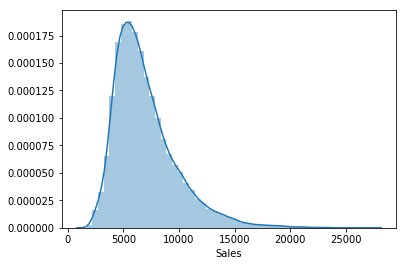

In [0]:
# Plot the target's distribution for the train set, before the transformation
sns.distplot(y_train);

In [0]:
# Log-transform the target for the train and test set
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

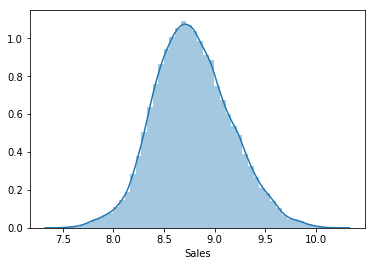

In [0]:
# Plot the target's distribution for the train set, after the transformation
sns.distplot(y_train_log);

## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

In [0]:
!pip install category_encoders

     |████████████████████████████████| 92kB 4.3MB/s 


In [0]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

CPU times: user 193 ms, sys: 56.1 ms, total: 249 ms
Wall time: 736 ms


In [0]:
# Use Gradient Boosting in pipeline together with Ordinal Encoder 
pipeline = make_pipeline(
                          ce.OrdinalEncoder(),
                          XGBRegressor(n_estimators=1000, n_jobs=-1))

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)

print('Validation Error =', np.sqrt(mean_squared_error(y_test_log, y_pred_log)))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Error = 0.15798460644485027


In [0]:
# Use scikit-learn cross_val_score to validate my model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train_log, cv=5,
                         scoring='neg_mean_squared_error')
print('RMSLE for 5 folds:', np.sqrt(-scores))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for 5 folds: [0.07039803 0.06993252 0.0564945  0.07057306 0.06151715]


In [0]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 'randomforestregressor__n_estimators': randint(50, 200),
                        'randomforestregressor__max_features': uniform(),
                        'randomforestregressor__min_samples_leaf': [1, 10, 50]}

search = RandomizedSearchCV(pipeline,
                            param_distributions=param_distributions,
                            n_iter=2,
                            cv=2,
                            scoring='neg_mean_squared_error',
                            verbose=10,
                            return_train_score=True,
                            n_jobs=-1)

search.fit(X_train, y_train_log)

print('Best hyperparameters', search.best_params_)
print('Cross-validation RMSLE', np.sqrt(-search.best_score_))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


ValueError: ignored

## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

In [0]:
!pip install eli5 pdpbox

     |████████████████████████████████| 102kB 6.4MB/s 
     |████████████████████████████████| 57.7MB 62.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

In [0]:
# Engineer 3+ more features
def wrangle(X):
    X = X.copy()
    
    # Merge data
    X = X.merge(store, left_on='Store', right_on='Store', how='left').fillna(0)
    
    # Engineer date
    X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)
    X['DateYear'] = X['Date'].dt.year
    X['DateMonth'] = X['Date'].dt.month
    X = X.drop(columns='Date')
    
    # Drop Sales as our goal is to predict its
    X = X.drop(columns='Sales')
    return X

In [0]:
X_train = wrangle(train)
X_test = wrangle(test)

In [0]:
# Permutation Importances plot
import eli5
from eli5.sklearn import PermutationImportance

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log)

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_test_encoded, y_test_log)
feature_names = X_test_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Weight,Feature
0.3033 ± 0.0013,Customers
0.0079 ± 0.0001,Promo
0.0050 ± 0.0001,StoreType
0.0047 ± 0.0001,CompetitionDistance
0.0013 ± 0.0000,DayOfWeek
0.0012 ± 0.0000,DateMonth
0.0009 ± 0.0000,Assortment
0.0007 ± 0.0000,DateYear
0.0003 ± 0.0000,CompetitionOpenSinceYear
0.0001 ± 0.0000,Promo2


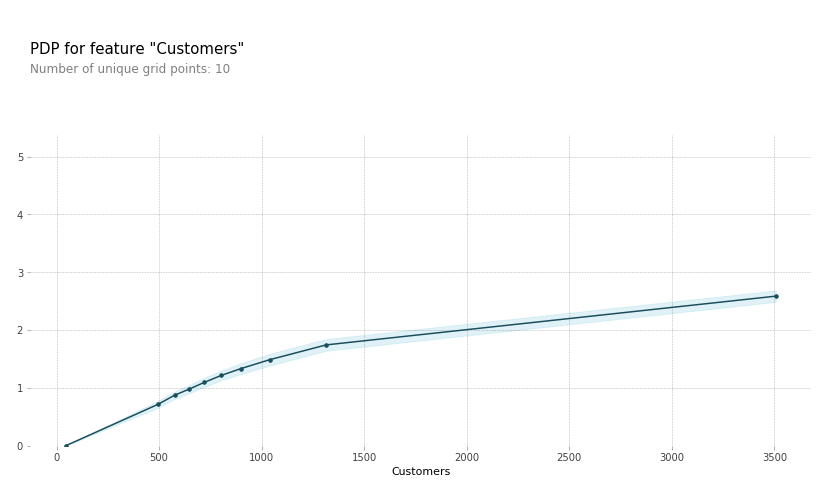

In [0]:
# Partial Dependency Plot, 1 feature isolation
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Customers'

isolated = pdp_isolate( model=model, 
                        dataset=X_test_encoded, 
                        model_features=X_test_encoded.columns, 
                        feature=feature)

pdp_plot(isolated, feature_name=feature, figsize=(14,8));

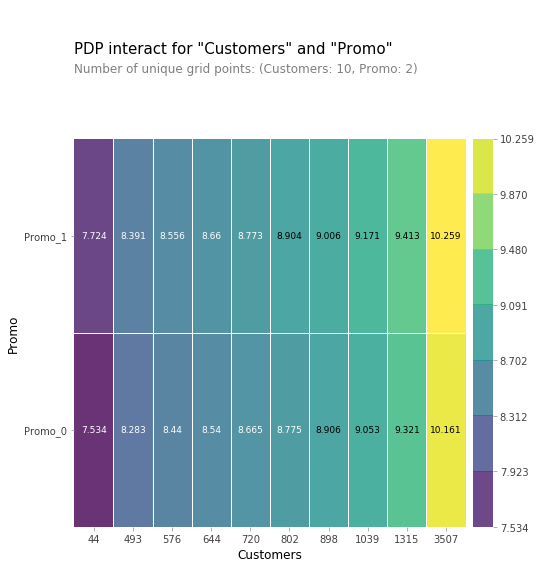

In [0]:
# Partial Dependency Plot, 2 feature interaction
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Customers', 'Promo']

interaction = pdp_interact( model=model, 
                            dataset=X_test_encoded, 
                            model_features=X_test_encoded.columns, 
                            features=features)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);